In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

2022-11-22 20:54:54.014141: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-22 20:54:54.014226: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def compress_to_size(img, width=500, height=500):
  new_x, new_y = img_np.shape[0], img_np.shape[1]
  if new_y > height:
    new_y = height
  if new_x > width:
    new_x = width
  new_image = img.resize((new_y, new_x))
  return np.array(new_image)

In [2]:
def preprocess_image(image):
  image_reshaped = image.reshape(1,96,96,1)
  X = image_reshaped/255.
  return X

In [3]:
def get_coordinates(df_target):
  coords = []

  for i in range(len(df_target)):
    for j in range(0,df_target.shape[1],2):
      coords.append([df_target.iloc[i,j],df_target.iloc[i,j+1]])

  coords = np.array(coords)
  return coords

In [51]:
def predict_keypoints(img):
  # model = model.load(open("../model/model_keypoints_detection.pkl","rb"))
  model = load_model('../model/model_beta')
  y_pred = model.predict(img, verbose=0)
  coords = get_coordinates(pd.DataFrame(y_pred))
  return coords

In [5]:
def plot_keypoints(img, keypoints):
  fig, ax = plt.subplots(facecolor="#11101B")
  ax.imshow(img)
  # plt.imshow(X.reshape(96,96), cmap='gray')
  ax.scatter(keypoints[0:15,0],keypoints[0:15,1], color='blue', label='actual')
  # ax.xaxis.set_visible(False)
  # ax.yaxis.set_visible(False)
  # for spine in ['top', 'right', 'left', 'bottom']:
  #   ax.spines[spine].set_visible(False)
  plt.show()
  # st.pyplot(fig)

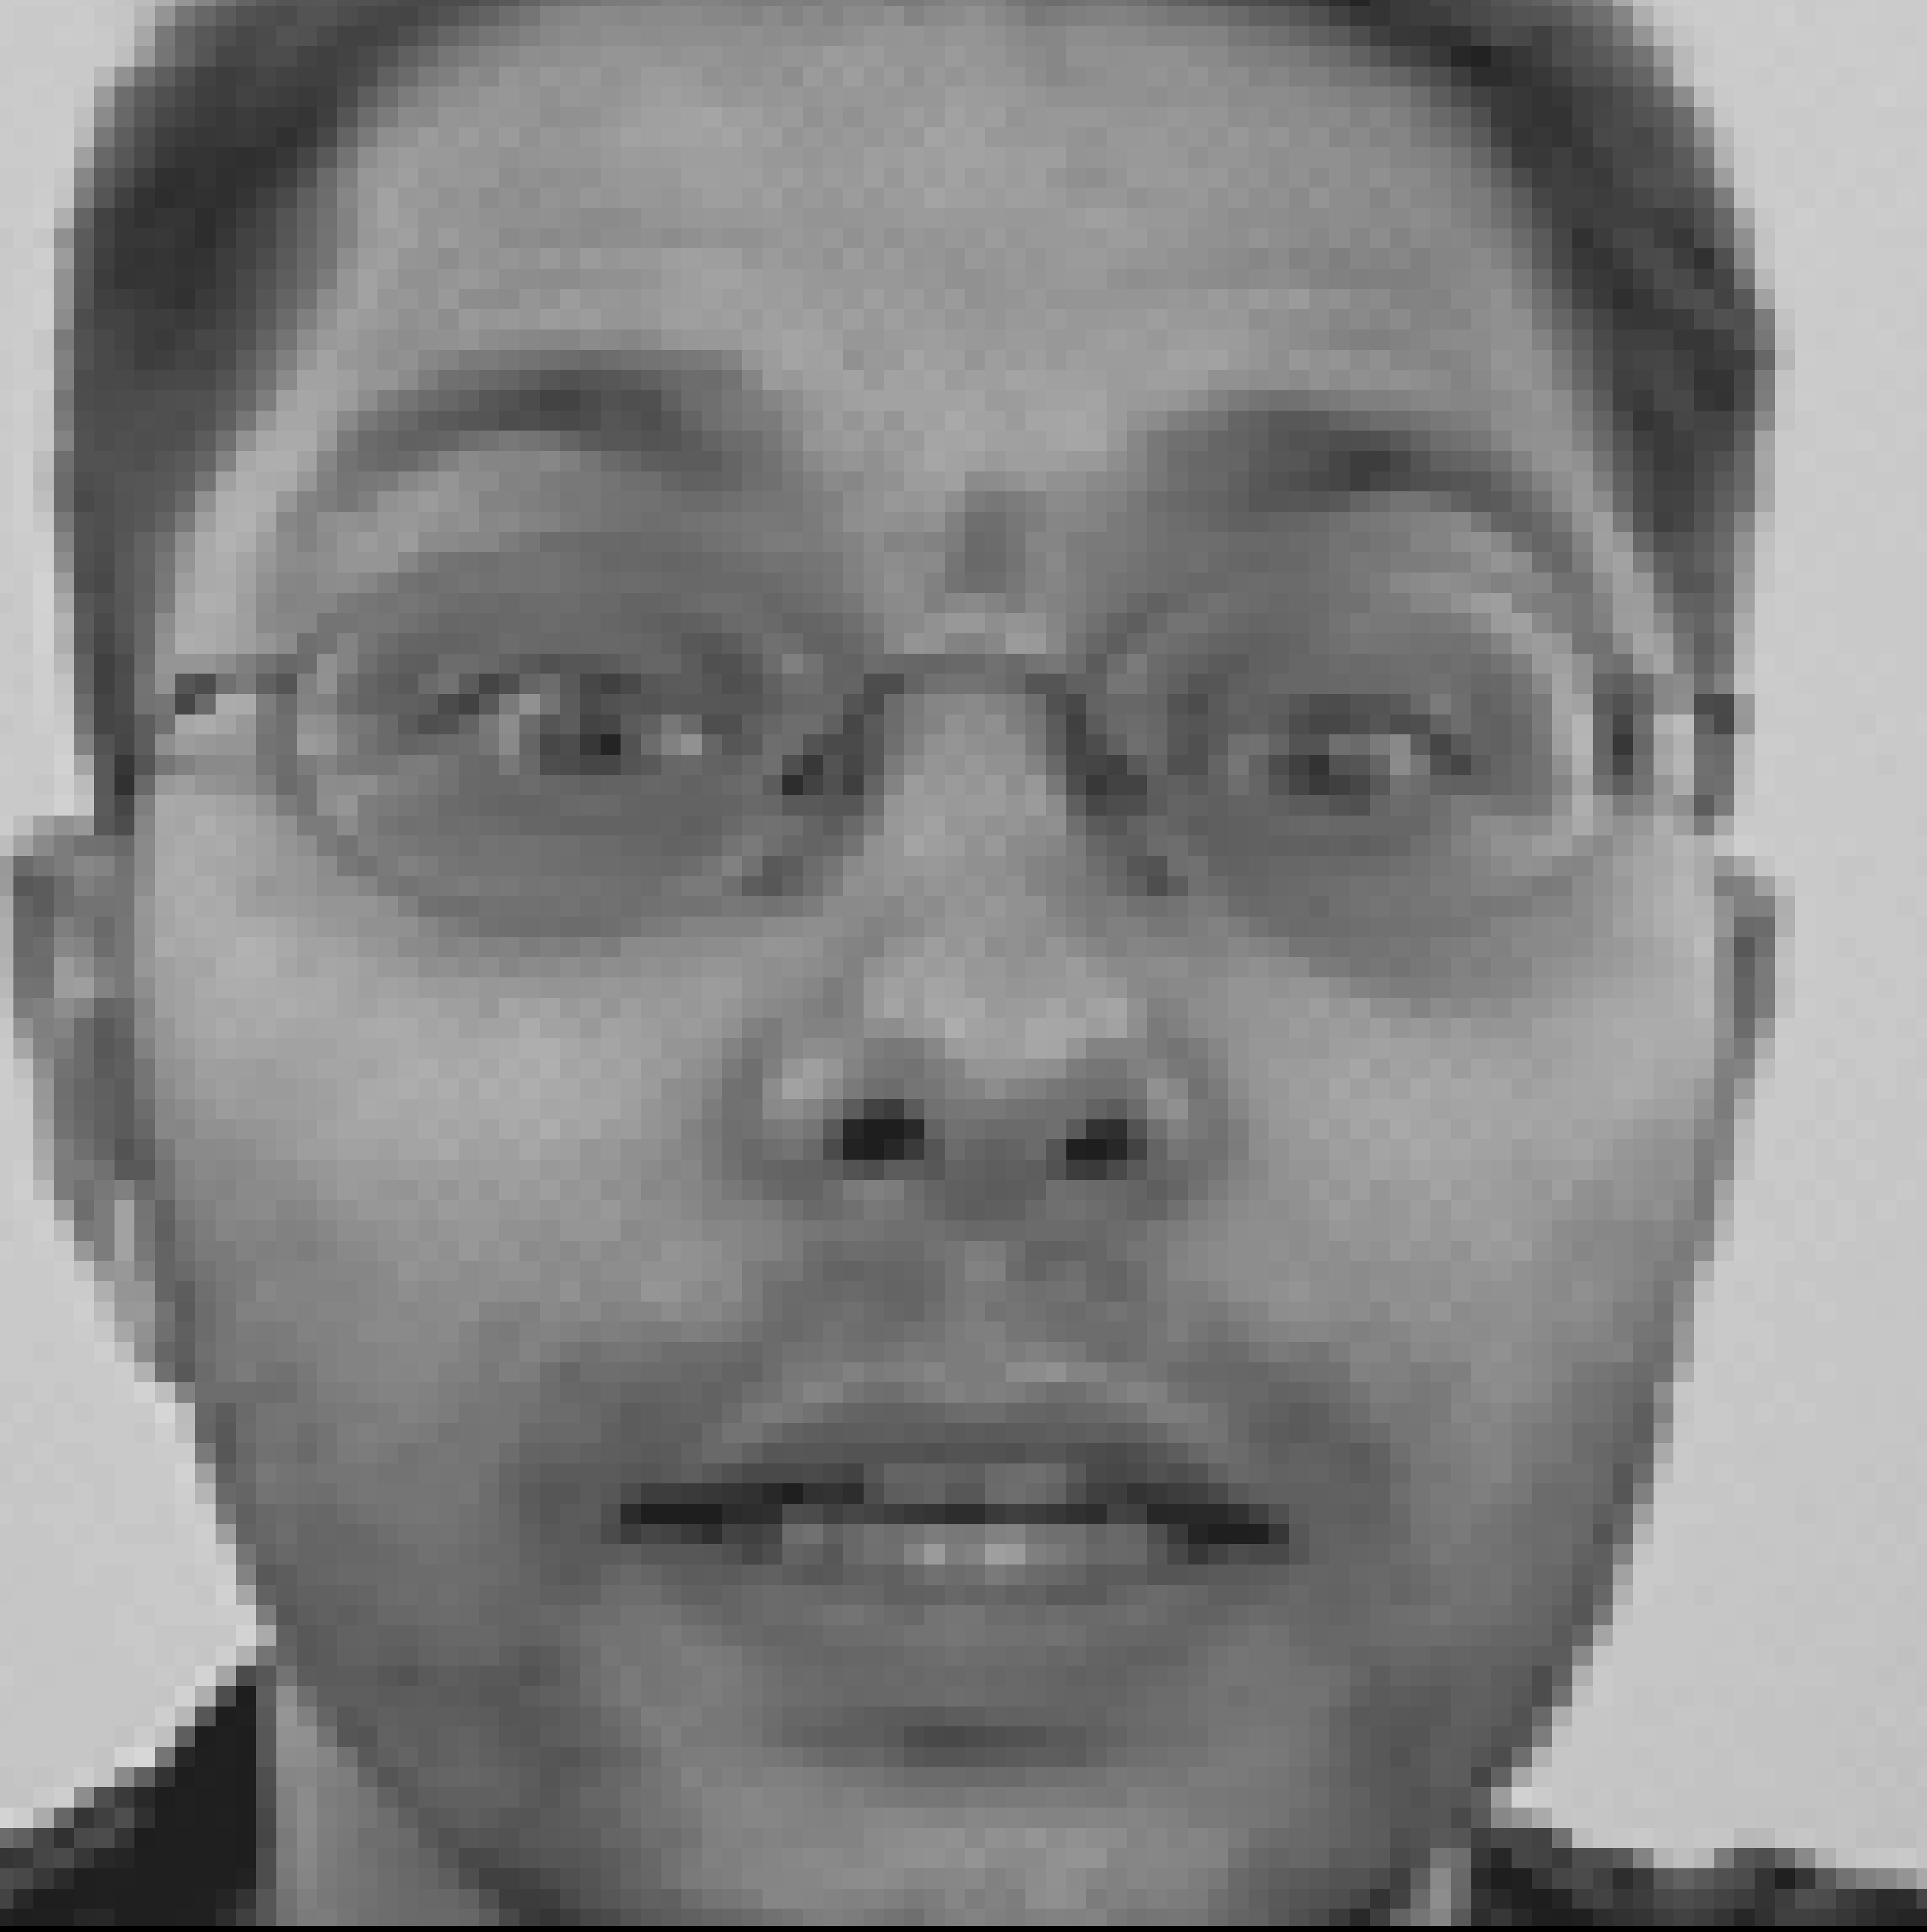

In [67]:
image_file = Image.open("test_image.png").convert('L')
image_file

In [24]:
im_resized = image_file.resize((96,96))

In [56]:
y, x = np.array(image_file).shape

In [57]:
img_np = np.array(im_resized)
# y, x = img_np.shape
print(img_np.shape)

(96, 96)


In [58]:
processed_img = preprocess_image(img_np)
processed_img.shape

(1, 96, 96, 1)

In [60]:
keypoints = predict_keypoints(processed_img)
keypoints

array([[58.309715, 35.563503],
       [33.953175, 34.2821  ],
       [53.71324 , 36.054695],
       [62.660675, 36.843716],
       [38.17855 , 35.24059 ],
       [28.768173, 35.11815 ],
       [52.124027, 25.7596  ],
       [68.53652 , 28.322582],
       [39.845047, 24.598259],
       [23.166855, 27.180435],
       [46.16641 , 51.50517 ],
       [53.57032 , 71.120674],
       [35.828117, 70.16975 ],
       [44.85693 , 64.88461 ],
       [44.52523 , 78.35676 ]], dtype=float32)

In [61]:
proportion = np.array([x/96, y/96]).reshape((1,-1))
proportion

array([[34.35416667, 34.44791667]])

In [62]:
new_keypoints = keypoints * proportion
new_keypoints

array([[2003.18167671, 1225.08859686],
       [1166.43301876, 1180.9469473 ],
       [1845.27365335, 1242.00913326],
       [2152.65527407, 1269.18924701],
       [1311.59229453, 1213.96487804],
       [ 988.30661742, 1209.74706348],
       [1790.67751956,  887.36454334],
       [2354.51509651,  975.65395296],
       [1368.84338538,  847.35877522],
       [ 795.87799295,  936.30936607],
       [1586.00849334, 1774.24576668],
       [1840.36370611, 2449.95905582],
       [1230.8451155 , 2417.20157647],
       [1541.02244178, 2235.13974285],
       [1529.6271863 , 2699.22707391]])

In [43]:
keypoints.shape

(15, 2)

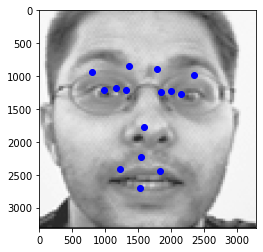

In [77]:
plt.imshow(image_file, cmap="Greys_r")
plt.scatter(x=new_keypoints[:,0],y=new_keypoints[:,1], color='blue', label='actual')

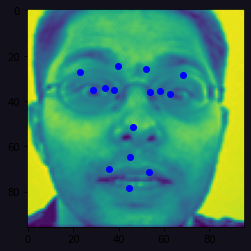

In [45]:
plot_keypoints(im_resized, keypoints)

In [46]:
model = pickle.load(open("../model/model_keypoints_detection.pkl","rb"))


2022-11-22 21:11:07.359449: E tensorflow/core/framework/node_def_util.cc:630] NodeDef mentions attribute validate_shape which is not in the op definition: Op<name=AssignVariableOp; signature=resource:resource, value:dtype -> ; attr=dtype:type; is_stateful=true> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node AssignNewValue}}


In [49]:
model.save("../notebooks/model/model_beta/")

INFO:tensorflow:Assets written to: ../notebooks/model/model_beta/assets


INFO:tensorflow:Assets written to: ../notebooks/model/model_beta/assets
